In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

data_dir = 'img/'
TARGET_SIZE = 224

#Prepare Dataset 
data_generator = ImageDataGenerator(
    data_format='channels_last',
    rescale=(1/255),
    #preprocessing_function=preprocess_input,
)

train_generator = data_generator.flow_from_directory(
    data_dir + 'train',
    target_size=(TARGET_SIZE,TARGET_SIZE),
    batch_size=64
)

valid_generator = data_generator.flow_from_directory(
     data_dir + 'val',
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=64 , shuffle=False
)

test_generator = data_generator.flow_from_directory(
    data_dir + 'val',
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=1
)

Using TensorFlow backend.


Found 5000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [2]:
x_train , y_train = next(valid_generator)

In [3]:
x_train.shape

(64, 224, 224, 3)

In [4]:
y_train.shape

(64, 10)

In [5]:
x_train[1]

array([[[0.48627454, 0.5647059 , 0.7019608 ],
        [0.48627454, 0.5647059 , 0.7019608 ],
        [0.48627454, 0.5647059 , 0.7019608 ],
        ...,
        [0.4901961 , 0.5803922 , 0.7137255 ],
        [0.49411768, 0.5803922 , 0.7137255 ],
        [0.49411768, 0.5803922 , 0.7137255 ]],

       [[0.48627454, 0.5647059 , 0.7019608 ],
        [0.48627454, 0.5647059 , 0.7019608 ],
        [0.48627454, 0.5647059 , 0.7019608 ],
        ...,
        [0.4901961 , 0.5803922 , 0.7137255 ],
        [0.49411768, 0.5803922 , 0.7137255 ],
        [0.49411768, 0.5803922 , 0.7137255 ]],

       [[0.48627454, 0.5647059 , 0.7019608 ],
        [0.48627454, 0.5647059 , 0.7019608 ],
        [0.4901961 , 0.5686275 , 0.7058824 ],
        ...,
        [0.49411768, 0.5764706 , 0.7137255 ],
        [0.49411768, 0.5803922 , 0.7137255 ],
        [0.49411768, 0.5803922 , 0.7137255 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

Populating the interactive namespace from numpy and matplotlib


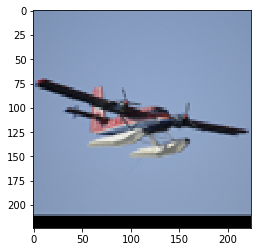

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(x_train[1] )
plt.show()

In [176]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [177]:
Gen = next(test_generator)

Populating the interactive namespace from numpy and matplotlib


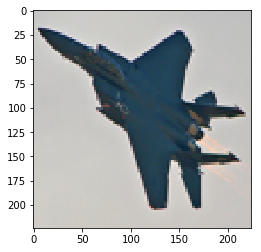

In [8]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(x_train[0])
plt.show()

In [9]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Model

In [11]:
from model.xception import build_xception as build_model

model = build_model(input_size=224,num_class=10,weight_decay=1e-5, dropout=0.25)

In [12]:
mck =  model.predict( x_train[1][newaxis, :] )

In [14]:
x_train[1][newaxis, :].shape

(1, 224, 224, 3)

In [15]:
mck.shape

(1, 10)

In [16]:
from model.mobilenet import build_mobilenet as build_model

model = build_model(input_size=224,num_class=10,weight_decay=1e-5, dropout=0.25)

In [18]:
mck =  model.predict( x_train[1][newaxis, :] )

In [19]:
x_train[1][newaxis, :].shape

(1, 224, 224, 3)

In [20]:
mck.shape

(1, 10)

In [25]:
mck

array([[0.11724167, 0.05924664, 0.0578576 , 0.18796091, 0.07479414,
        0.05774704, 0.03053768, 0.07532797, 0.21774194, 0.12154442]],
      dtype=float32)

In [22]:
np.argmax(mck)

8

In [24]:
np.argmax(y_train[1])

0